In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV, Lasso
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('df_original.csv')
df = df.drop(columns='Unnamed: 0')

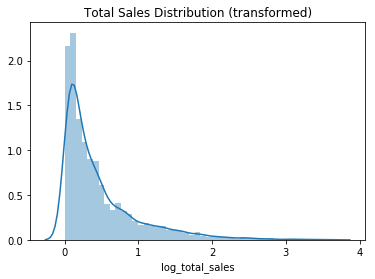

In [3]:
sns.distplot(df['log_total_sales'])
sns.set_style("whitegrid")
plt.title('Total Sales Distribution (transformed)')
plt.savefig("target_dist_1st.png") 

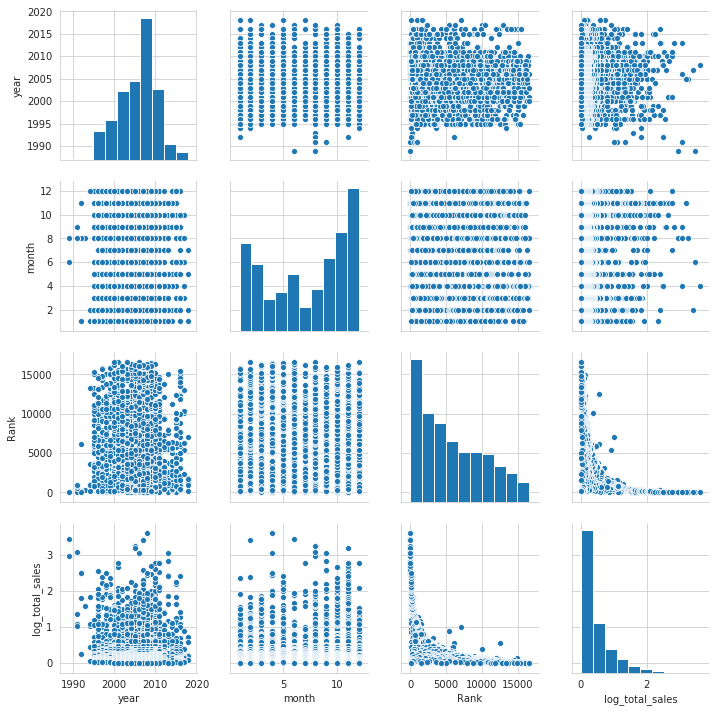

In [4]:
# analyze features
features1 = df.drop(columns=['time_delta', 'total_sales'])
features = list(features1.describe().columns)
sns.pairplot(data=df, vars=features)

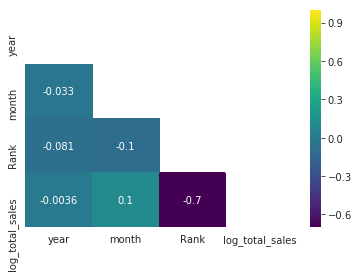

In [6]:
mask = np.triu(np.array(np.ones(df[features].corr().shape)))
#plot a hitmap
sns.heatmap(df[features].corr(), cmap='viridis', mask=mask, annot=True)
plt.savefig("heatmap_1st.png") 
# rank and log_total_sales has a high negative correlation
#this happens because the lower the rank number, the higher the sales volume

In [8]:
# Transform categorical features into values
gm = pd.get_dummies(df[['genre','platform','ratings','time_delta','year', 'month','Rank', 'Publisher']]) #can just apply it to the whole df
gm['target'] = df['log_total_sales']
# gm['time_delta'] = df['time_delta']

In [9]:
X = gm.drop(columns='target')
y = gm['target']

In [10]:
from sklearn.model_selection import train_test_split
# hold out 20% of the data for final testing
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, 
                                        random_state=42)
# divide the data again, train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, 
                                        random_state=42)

In [11]:
#Linear
from sklearn.linear_model import LinearRegression

# create a regression object
lm = LinearRegression()
# train the model using the training sets
lm_fit = lm.fit(X_train,y_train)

# R2/score
train_score_linear = lm.score(X_train,y_train)
test_score_linear = lm.score(X_test,y_test)
train_score_linear, test_score_linear


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(0.599175580403511, 0.5524718840658345)

In [12]:
# Standidize scale
std = StandardScaler()
std.fit(X_train)

# Apply scaler to train set
X_tr = std.transform(X_train)

# Apply the scaler to test set
X_te = std.transform(X_test)

# Apply the scaler to holdout set
X_ho = std.transform(X_holdout)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [13]:
#lasso
#dividing non-test dataset into 5 and testing automatically
reg = LassoCV(cv=5, random_state=0).fit(X_tr, y_train)
train_score_lasso = reg.score(X_tr, y_train)
test_score_lasso = reg.score(X_te, y_test)
hold_score_lasso = reg.score(X_ho, y_holdout)
lassocv_alpha = reg.alpha_
train_score_lasso, test_score_lasso, hold_score_lasso

(0.5772526969649698, 0.5645246531981091, 0.5540481739918971)

In [14]:
coef_dict = {}
for coef, feat in zip(reg.coef_,X_train):
    coef_dict[feat] = coef

In [21]:
#Ridge
lm_ridge = RidgeCV(cv=5)
ridge_fit = lm_ridge.fit(X_tr, y_train)
train_score_ridge2 = ridge_fit.score(X_tr, y_train)
test_score_ridge2 = ridge_fit.score(X_te, y_test)
train_score_ridge2, test_score_ridge2

(0.5988124463810602, 0.5543664274538074)

In [22]:
selected_columns_3 = ['time_delta',
 'year',
 'month',
 'Rank',
 'genre_Action',
 'genre_Action-Adventure',
 'genre_Adventure',
 'genre_Fighting',
 'genre_Misc',
 'genre_Music',
 'genre_Party',
 'genre_Platform',
 'genre_Puzzle',
 'genre_Racing',
 'genre_Role-Playing',
 'genre_Shooter',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy',
 'genre_Visual Novel',
 'platform_3DO',
 'platform_3DS',
 'platform_DC',
 'platform_DS',
 'platform_GB',
 'platform_GBA',
 'platform_GBC',
 'platform_GC',
 'platform_GEN',
 'platform_N64',
 'platform_NS',
 'platform_PC',
 'platform_PS',
 'platform_PS2',
 'platform_PS3',
 'platform_PS4',
 'platform_PSN',
 'platform_PSP',
 'platform_PSV',
 'platform_SAT',
 'platform_SNES',
 'platform_VC',
 'platform_WW',
 'platform_Wii',
 'platform_WiiU',
 'platform_X360',
 'platform_XB',
 'platform_XOne',
 'ratings_E',
 'ratings_E10',
 'ratings_M',
 'ratings_T',
 'Publisher_10TACLE Studios',
 'Publisher_3DO',
 'Publisher_505 Games',
 'Publisher_5pb',
 'Publisher_AQ Interactive',
 'Publisher_ASC Games',
 'Publisher_ASCII Entertainment',
 'Publisher_Acclaim Entertainment',
 'Publisher_Activision',
 'Publisher_Activision Value',
 'Publisher_Agetec',
 'Publisher_Aksys Games',
 'Publisher_Altron',
 'Publisher_Arc System Works',
 'Publisher_Arika',
 'Publisher_ArtDink',
 'Publisher_Atari',
 'Publisher_Atlus',
 'Publisher_Avanquest',
 'Publisher_BAM! Entertainment',
 'Publisher_BMG Interactive Entertainment',
 'Publisher_Banpresto',
 'Publisher_Bethesda Softworks',
 'Publisher_Black Bean Games',
 'Publisher_Blue Byte',
 'Publisher_Capcom',
 'Publisher_Cave',
 'Publisher_ChunSoft',
 'Publisher_City Interactive',
 'Publisher_Codemasters',
 'Publisher_Conspiracy Entertainment',
 'Publisher_Crave Entertainment',
 'Publisher_Culture Publishers',
 'Publisher_CyberFront',
 'Publisher_D3Publisher',
 'Publisher_DHM Interactive',
 'Publisher_DTP Entertainment',
 'Publisher_Data Design Interactive',
 'Publisher_Deep Silver',
 'Publisher_Disney Interactive Studios',
 'Publisher_DreamCatcher Interactive',
 'Publisher_DreamWorks Interactive',
 'Publisher_EON Digital Entertainment',
 'Publisher_ESP',
 'Publisher_Eidos Interactive',
 'Publisher_Electronic Arts',
 'Publisher_Electronic Arts Victor',
 'Publisher_Elite',
 'Publisher_Empire Interactive',
 'Publisher_Enix Corporation',
 'Publisher_Enterbrain',
 'Publisher_Ertain',
 'Publisher_Falcom Corporation',
 'Publisher_Focus Home Interactive',
 'Publisher_Foreign Media Games',
 'Publisher_Fox Interactive',
 'Publisher_From Software',
 'Publisher_Funbox Media',
 'Publisher_GSP',
 'Publisher_GT Interactive',
 'Publisher_Game Factory',
 'Publisher_Game Life',
 'Publisher_Gamebridge',
 'Publisher_Genki',
 'Publisher_Ghostlight',
 'Publisher_Global A Entertainment',
 'Publisher_Global Star',
 'Publisher_Gotham Games',
 'Publisher_Gremlin Interactive Ltd',
 'Publisher_GungHo',
 'Publisher_Gust',
 'Publisher_Hasbro Interactive',
 'Publisher_Hip Interactive',
 'Publisher_Hudson Entertainment',
 'Publisher_Hudson Soft',
 'Publisher_Human Entertainment',
 'Publisher_Idea Factory',
 'Publisher_Idea Factory International',
 'Publisher_Ignition Entertainment',
 'Publisher_Imagineer',
 'Publisher_Infogrames',
 'Publisher_Intergrow',
 'Publisher_Interplay Productions',
 'Publisher_Irem Software Engineering',
 'Publisher_JVC',
 'Publisher_Jaleco',
 'Publisher_Jester Interactive',
 'Publisher_JoWood Productions',
 'Publisher_Kadokawa Shoten',
 'Publisher_Kemco',
 'Publisher_Konami Digital Entertainment',
 'Publisher_Kool Kizz',
 'Publisher_LSP Games',
 'Publisher_Laguna',
 'Publisher_Lexicon Entertainment',
 'Publisher_Little Orbit',
 'Publisher_LucasArts',
 'Publisher_MTV Games',
 'Publisher_Majesco Entertainment',
 'Publisher_Marvelous Entertainment',
 'Publisher_Marvelous Interactive',
 'Publisher_Mastertronic',
 'Publisher_Max Five',
 'Publisher_Maxis',
 'Publisher_Media Rings',
 'Publisher_Mercury Games',
 'Publisher_Metro 3D',
 'Publisher_Micro Cabin',
 'Publisher_Microids',
 'Publisher_Microprose',
 'Publisher_Microsoft Game Studios',
 'Publisher_Midas Interactive Entertainment',
 'Publisher_Midway Games',
 'Publisher_Milestone',
 'Publisher_Mindscape',
 'Publisher_Mitsui',
 'Publisher_Monte Christo Multimedia',
 'Publisher_Moss',
 'Publisher_NCSoft',
 'Publisher_Namco Bandai Games',
 'Publisher_Natsume',
 'Publisher_Nintendo',
 'Publisher_Nippon Ichi Software',
 'Publisher_Nobilis',
 'Publisher_Nordcurrent',
 'Publisher_Nordic Games',
 'Publisher_Ocean',
 'Publisher_Oxygen Interactive',
 'Publisher_P2 Games',
 'Publisher_PQube',
 'Publisher_Pack In Soft',
 'Publisher_Palcom',
 'Publisher_Phenomedia',
 'Publisher_Play It',
 'Publisher_Playlogic Game Factory',
 'Publisher_Popcorn Arcade',
 'Publisher_Psygnosis',
 'Publisher_RTL',
 'Publisher_Rage Software',
 'Publisher_RedOctane',
 'Publisher_Rising Star Games',
 'Publisher_Rondomedia',
 'Publisher_SCi',
 'Publisher_SNK',
 'Publisher_SNK Playmore',
 'Publisher_Sammy Corporation',
 'Publisher_Saurus',
 'Publisher_Sega',
 'Publisher_Sony Computer Entertainment',
 'Publisher_Sony Computer Entertainment Europe',
 'Publisher_SouthPeak Games',
 'Publisher_Spike',
 'Publisher_Square Enix',
 'Publisher_SquareSoft',
 'Publisher_Starfish',
 'Publisher_Sting',
 'Publisher_Success',
 'Publisher_Sunsoft',
 'Publisher_Swing! Entertainment',
 'Publisher_Syscom',
 'Publisher_System 3 Arcade Software',
 'Publisher_TDK Mediactive',
 'Publisher_THQ',
 'Publisher_Taito',
 'Publisher_Takara',
 'Publisher_Takara Tomy',
 'Publisher_Take-Two Interactive',
 'Publisher_Tecmo Koei',
 'Publisher_Telstar',
 'Publisher_Time Warner Interactive',
 'Publisher_Titus',
 'Publisher_Tivola',
 'Publisher_Tomy Corporation',
 'Publisher_Tradewest',
 'Publisher_UFO Interactive',
 'Publisher_Ubisoft',
 'Publisher_Ubisoft Annecy',
 'Publisher_Universal Interactive',
 'Publisher_Valve Software',
 'Publisher_Victor Interactive',
 'Publisher_Video System',
 'Publisher_Vir2L Studios',
 'Publisher_Virgin Interactive',
 'Publisher_Vivendi Games',
 'Publisher_Wanadoo',
 'Publisher_Warner Bros. Interactive Entertainment',
 'Publisher_Xicat Interactive',
 'Publisher_Xing Entertainment',
 'Publisher_Xplosiv',
 'Publisher_Xseed Games',
 'Publisher_Zoo Digital Publishing',
 'Publisher_Zushi Games', 'Publisher_others']

In [23]:
selected_columns = ['time_delta',
 'year',
 'month',
 'Rank']

In [24]:
#Polynomial

poly = PolynomialFeatures()

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_tr), y_train)
y_pred = lm_poly.predict(poly.transform(X_te))
print("Polynomial Regression:", r2_score(y_test, y_pred))
poly_r2_score_2 = r2_score(y_test, y_pred)
poly_r2_score_2

Polynomial Regression: -2.631122489128524e+24


-2.631122489128524e+24

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lm.predict(X_ho)
print("Linear Regression:", r2_score(y_holdout, y_pred))

y_pred = reg.predict(X_ho)
print("Lasso Regression:", r2_score(y_holdout, y_pred))

y_pred = ridge_fit.predict(X_ho)
print("Ridge Regression:", r2_score(y_holdout, y_pred))

Linear Regression: -2331743.4038985223
Lasso Regression: 0.5540481739918971
Ridge Regression: 0.5515511486864003


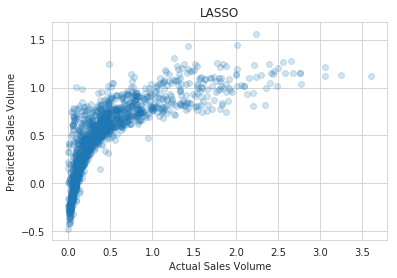

In [26]:
test_score_linear = reg.score(X_ho,y_holdout)
y_train_pred = reg.predict(X_tr)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.xlabel('Actual Sales Volume')
plt.ylabel('Predicted Sales Volume')
plt.title('LASSO')
plt.savefig("Lasso_1st.png") 

For games that doesn't perform very well, my model is predicting an even worst scenarium
For thos games that are located on the end of the tail, a huge sales volume, the model can't predict that they will perform that good. The model gives a maximum total sales of 1.5million units.


In [27]:
df_corr = df.corr()

In [29]:
df_corr.to_csv('df_corr.csv')

In [30]:
df_corr

,total_sales,time_delta,year,month,Rank,log_total_sales
total_sales,1.000000,0.023685,-0.027651,0.069082,-0.426273,0.855203
time_delta,0.023685,1.000000,-0.998248,-0.026402,0.087167,-0.002430
year,-0.027651,-0.998248,1.000000,-0.032562,-0.081402,-0.003591
month,0.069082,-0.026402,-0.032562,1.000000,-0.100901,0.103804
Rank,-0.426273,0.087167,-0.081402,-0.100901,1.000000,-0.700775
log_total_sales,0.855203,-0.002430,-0.003591,0.103804,-0.700775,1.000000


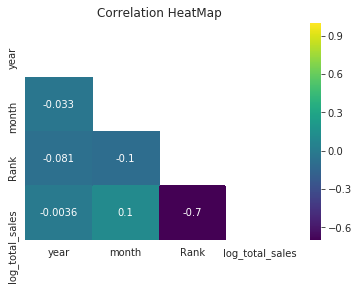

In [31]:
df_corr = df.drop(columns=['time_delta', 'total_sales'])
df_corr = df_corr.corr()
# features1 = df.drop(columns=['time_delta', 'total_sales'])
features = list(df_corr.describe().columns)
mask = np.triu(np.array(np.ones(df[features].corr().shape)))
sns.set_style("whitegrid")
sns.heatmap(df_corr, cmap='viridis', mask=mask, annot=True)
plt.title('Correlation HeatMap')
plt.savefig("heatmap_1st.png") 

In [32]:
df_corr = df.drop(columns=['time_delta', 'total_sales'])
df_corr = df_corr.corr()
# features1 = df.drop(columns=['time_delta', 'total_sales'])
features = list(df_corr.describe().columns)
mask = np.triu(np.array(np.ones(df[features].corr().shape)))

In [34]:
df_corr

,year,month,Rank,log_total_sales
year,1.000000,-0.032562,-0.081402,-0.003591
month,-0.032562,1.000000,-0.100901,0.103804
Rank,-0.081402,-0.100901,1.000000,-0.700775
log_total_sales,-0.003591,0.103804,-0.700775,1.000000
